In [5]:
import census_read_geopandas as crg
#import geopandas as gp

# Get LAD GeoJSON
london_lads_gdf = crg.read_london_lad_geopandas()
london_lads_gdf.head()

Read lad shapefile: 3.1144888401031494 seconds


,lad11cd,lad11cdo,lad11nm,lad11nmw,objectid,st_lengths,st_areasha,geometry
293,E09000001,00AA,City of London,None,294,9249.685667,2.903932e+06,"POLYGON ((-0.09671 51.52319, -0.09670 51.52316..."
294,E09000002,00AB,Barking and Dagenham,None,295,40695.465915,3.610781e+07,"MULTIPOLYGON (((0.14807 51.59640, 0.14806 51.5..."
295,E09000003,00AC,Barnet,None,296,50818.504733,8.674832e+07,"POLYGON ((-0.18211 51.66860, -0.18320 51.66692..."
296,E09000004,00AD,Bexley,None,297,45148.006588,6.058125e+07,"MULTIPOLYGON (((0.12859 51.51329, 0.13038 51.5..."
297,E09000005,00AE,Brent,None,298,38334.046571,4.323264e+07,"POLYGON ((-0.26476 51.59818, -0.26428 51.59778..."


<AxesSubplot:>

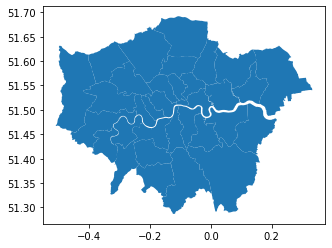

In [6]:
london_lads_gdf.plot()

In [8]:
import census_read_data as crd
index = crd.read_index()
table_names = crd.get_table_names(index)
print(table_names)

Read data Excel: 0.08100152015686035 seconds
Read data Index: 0.004958152770996094 seconds
[('DC1104EW', 'DC1104EW: Residence type by sex by age '), ('DC1106EW', 'DC1106EW: Schoolchildren and full-time students at their non term-time address by sex by age'), ('DC1107EW', 'DC1107EW: Marital and civil partnership status by sex by age'), ('DC1108EW', 'DC1108EW: Living arrangements by sex by age'), ('DC1109EW', 'DC1109EW: Household composition by age by sex'), ('DC1110EWla', 'DC1110EWla: Concealed family status by family type by dependent children by age of Family Reference Person (FRP)'), ('DC1112EWla', 'DC1112EWla: Age of youngest dependent child by household type by sex by age'), ('DC1113EW', 'DC1113EW: Age of youngest dependent child by household type'), ('DC1115EW', 'DC1115EW: Age of youngest dependent child by family type by marital status by age of Family Reference Person (FRP)'), ('DC1201EW', 'DC1201EW: Household composition by ethnic group of Household Reference Person (HRP)'), ('

In [11]:
table_name = table_names[0][0]
tdf = crd.read_table(table_name)
categories = crd.get_table_column_names_and_values(tdf)
print(categories)
datacol = table_name + tdf.iloc[0, -1]
print(datacol)
df = crd.read_data(table_name)
print(df.head())


Load table DC1104EW: 0.012996435165405273 seconds
[('Age', ['All', 'Age 0 to 4', 'Age 5 to 7', 'Age 8 to 9', 'Age 10 to 14', 'Age 15', 'Age 16 to 17', 'Age 18 to 19', 'Age 20 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84', 'Age 85 and over']), ('Residence type', ['All', 'Lives in a household', 'Lives in a communal establishment']), ('Sex', ['All', 'Males', 'Females'])]
DC1104EW0001
Load data DC1104EW: 0.12181496620178223 seconds
  GeographyCode  DC1104EW0001  DC1104EW0002  DC1104EW0003  DC1104EW0004  \
0     K04000001      56075912      27573376      28502536      55071113   
1     E92000001      53012456      26069148      26943308      52059931   
2     W92000004       3063456       1504228       1559228       3011182   
3     E12000001       2596886       1269703       1327183       2550818   
4     E12000002       7052177       3464

<AxesSubplot:>

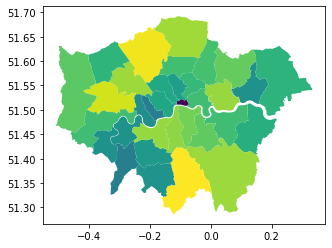

In [12]:
gdf = london_lads_gdf.merge(df, left_on='lad11cd', right_on='GeographyCode')
gdf.plot(column=datacol)


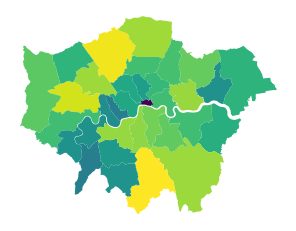

In [13]:
ax = gdf.plot(column=datacol)
ax.set_axis_off()

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

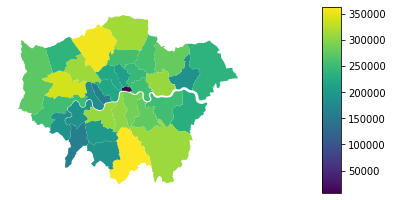

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.0)
fig.tight_layout()
gdf.plot(column=datacol, ax=ax, legend=True, cax=cax)
fig.show
